In [ ]:
!conda install scikit-image

### Import Packages

In [1]:
from omero.gateway import BlitzGateway
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, restoration
from scipy.signal import convolve2d as conv2

### OMERO Credentials

In [59]:
HOST = 'tadpole.openmicroscopy.org'
USERNAME = 'user-1'
PASSWORD = ''
PORT = 4064
conn = BlitzGateway(USERNAME, PASSWORD, host=HOST, port=PORT)
conn.connect()

True

### OMERO Image ID

In [60]:
image_id = 2732

### Print Image Name

In [61]:
image = conn.getObject("Image", image_id)
print image.getName(), image.getDescription()

P-TRE_10_R3D_D3D.dv 


### Split channel view for an individual plane

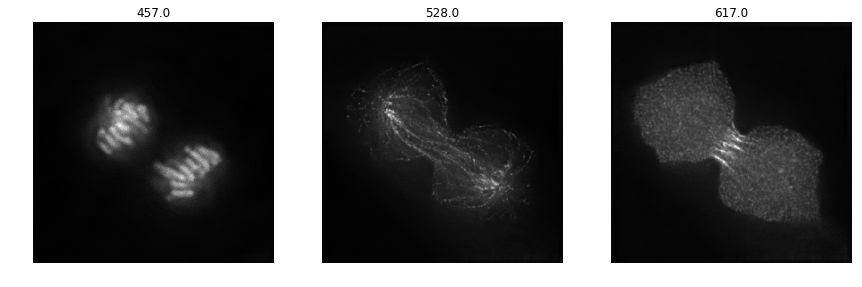

In [62]:
pixels = image.getPrimaryPixels()
channels = image.getChannels()
z_plane = 35
plt.figure(figsize=(25, 20))

for idx, channel in enumerate(channels):
    plt.subplot(1,5,idx+1)
    image_plane = pixels.getPlane(z_plane, idx, 0)
    plt.imshow(image_plane, cmap='gray')
    plt.axis('off')
    plt.title(channel.getLabel())

### Deconvolve and display the images

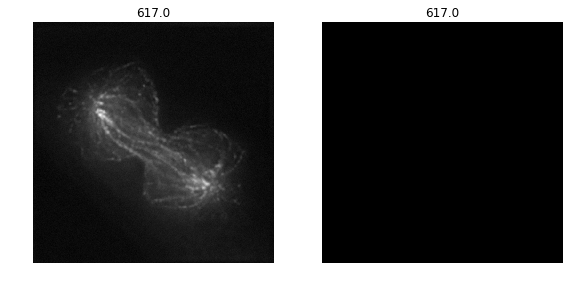

In [85]:
%matplotlib inline
image_plane = pixels.getPlane(z_plane, 1, 0)
psf = np.ones((5, 5)) / 25
convolve_with_psf = conv2(image_plane, psf, 'same')
convolve_with_psf += 0.1 * convolve_with_psf.std() * np.random.standard_normal(convolve_with_psf.shape)

deconvolved, _ = restoration.unsupervised_wiener(convolve_with_psf, psf)

plt.figure(figsize=(25, 20))
plt.subplot(1,5,1)
plt.imshow(convolve_with_psf, cmap='gray')
plt.axis('off')
plt.title(channel.getLabel())

plt.subplot(1,5,2)
plt.imshow(deconvolved, cmap='gray')
plt.axis('off')
plt.title(channel.getLabel())